# Task 4.1+ Supervised Learning - Regression (optional)

Dataset preview:
   Unnamed: 0     biking    smoking  heartdisease
0           1  30.801246  10.896608     11.769423
1           2  65.129215   2.219563      2.854081
2           3   1.959665  17.588331     17.177803
3           4  44.800196   2.802559      6.816647
4           5  69.428454  15.974505      4.062224

Correlation matrix:
              Unnamed: 0    biking   smoking  heartdisease
Unnamed: 0      1.000000  0.057088  0.052674     -0.051725
biking          0.057088  1.000000  0.015136     -0.935455
smoking         0.052674  0.015136  1.000000      0.309131
heartdisease   -0.051725 -0.935455  0.309131      1.000000

Displaying histograms for all features...


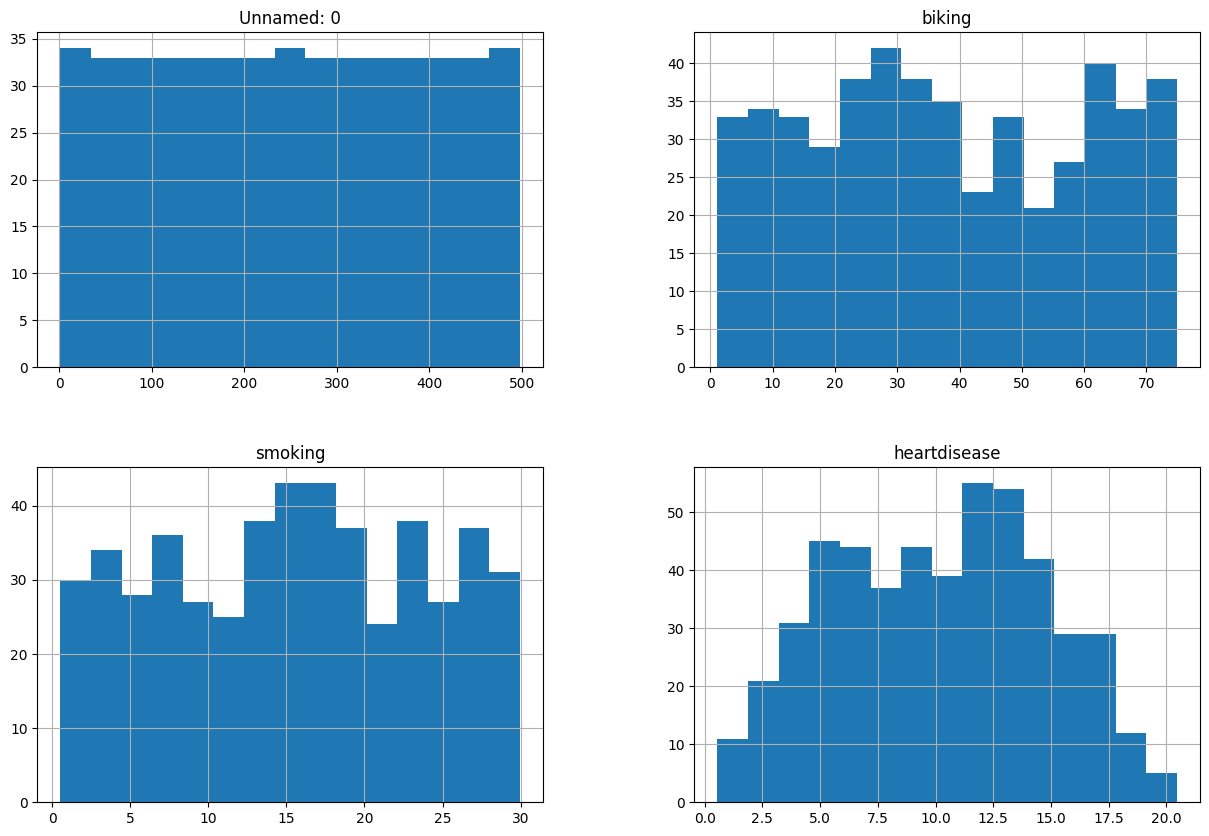


Displaying scatter plot matrix...


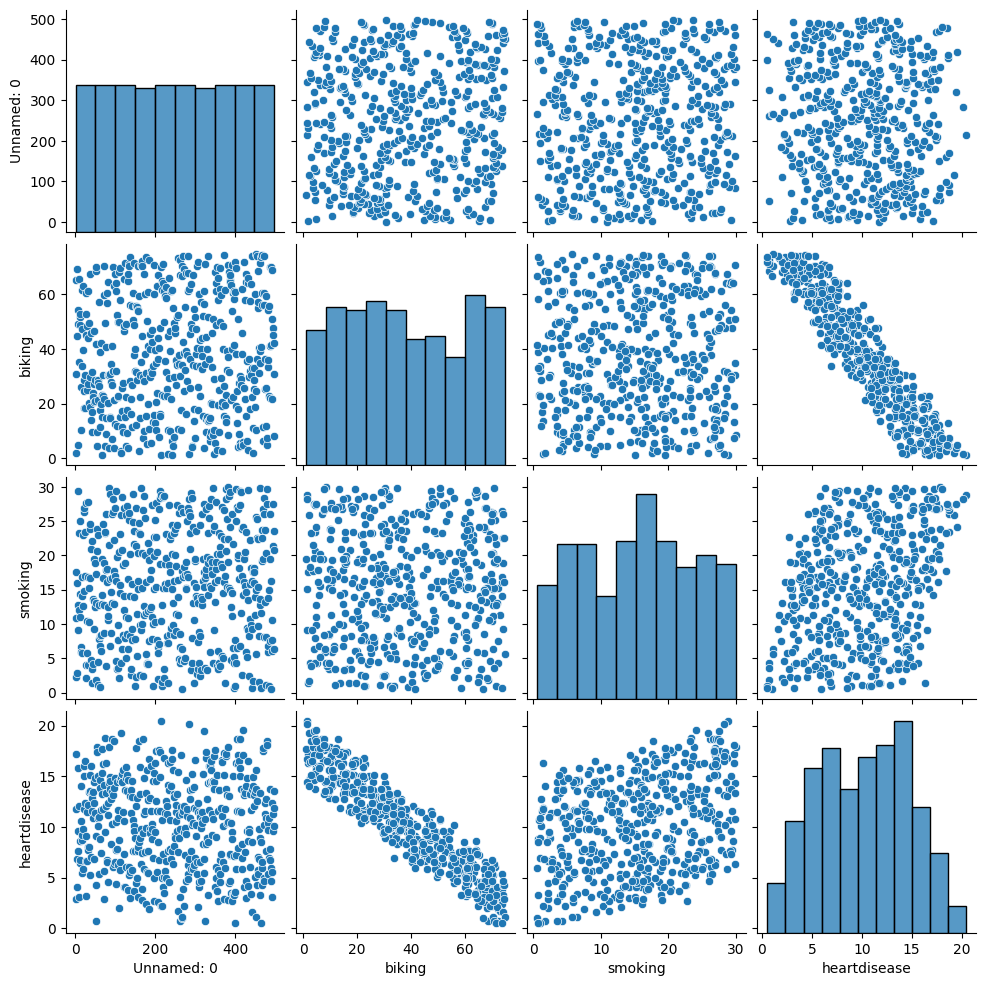

KeyError: "['cholesterol'] not found in axis"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import shutil
import os

# Load the dataset
file_path = 'Downloads/heartdata (1).csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset preview:")
print(heart_data.head())

# Check the assumptions of linear regression

# 1. Correlation Test
print("\nCorrelation matrix:")
correlation_matrix = heart_data.corr()
print(correlation_matrix)

# 2. Histograms
print("\nDisplaying histograms for all features...")
heart_data.hist(bins=15, figsize=(15, 10))
plt.show()

# 3. Scatter plots
print("\nDisplaying scatter plot matrix...")
sns.pairplot(heart_data)
plt.show()

# Assuming 'target_variable' is the target column in the dataset
# Replace 'target_variable' with the actual target column name
target_column = 'cholesterol'  

# Fit a linear regression model
X = heart_data.drop(target_column, axis=1)
y = heart_data[cholesterol]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Coefficients
print(f'\nCoefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Train the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'\nCross-Validation R^2 Scores: {cv_scores}')
print(f'Mean Cross-Validation R^2 Score: {cv_scores.mean()}')

